In [1]:
include("figures-preamble.jl")

In [2]:
discretisey(pts,fun,sym) = vec([1,1]*(round(Int,fun.(pts)+0.5,RoundNearestTiesUp)-0.5-(sym==:Down ?isinteger.(fun.(pts)):0))') 
discretisex(pts) = vec([pts'-0.5; pts'+0.5])
heaviside(x) = x < 0 ? -1 : 1

p1 = 2/3; p2 = 1/5
l1i = 2/3.5; l2i = 1/3.5
maxv(x) = max(x*p1,x*p2)

p = 2/4
cli = 2/5

K(x) = 1/(1+x/20)
coefbd(j,k) = k == 0 ? K(abs(j)) : j/k > p1 ? K(abs(j-p1*k)) : j/k < p2 ? K(abs(p2*k-j)) : one(j)
coefbd2(j,k) = k == 0 ? K(abs(j)) : j/k > p ? K(abs(j-p*k)) : one(j)

coefbd2 (generic function with 1 method)

## theorems-1

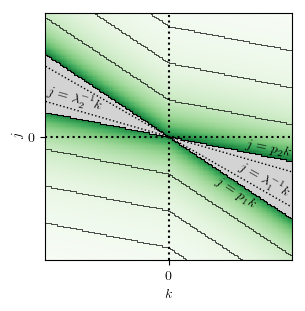

In [3]:
figure(figsize=(5*0.75/0.7*0.8,3.75*0.75/0.7*0.8))
gca()[:set_aspect]("equal")
N = 100

xlim(-N-1/2,N+1/2)
ylim(-N-1/2,N+1/2)
xticks([0]);yticks([0])
xlabel("\$k\$"); ylabel("\$j\$")

kpts = -N:N; jpts = -N:N
fill_between(discretisex(kpts),discretisey(kpts,x->-maxv(x),:Down),discretisey(kpts,x->maxv(-x),:Up),linewidth=0,facecolor="lightgrey")
plot(discretisex(kpts),discretisey(kpts,x->-maxv(x),:Down),"k",linewidth=0.75)
plot(discretisex(kpts),discretisey(kpts,x->maxv(-x),:Up),"k",linewidth=0.75)


for n = 30:30:2N
    plot(discretisex(kpts),discretisey(kpts,x->-maxv(x)-n,:Down),"k",linewidth=0.5)
 plot(discretisex(kpts),discretisey(kpts,x->maxv(-x)+n,:Up),"k",linewidth=0.5)
end

plot(kpts,-kpts*l1i,"k:",linewidth=1); plot(kpts,-kpts*l2i,"k:",linewidth=1)
prop = 0.76; text(prop*N,N/13-l1i*prop*N,"\$j=\\lambda\_1\^\{-1\} k\$",
verticalalignment="center",horizontalalignment="center",rotation=-atand(l1i))
prop = -0.78; text(prop*N,N/14-l2i*prop*N,"\$j=\\lambda\_2\^\{-1\} k\$",
    verticalalignment="center",horizontalalignment="center",rotation=-atand(l2i))

prop= 0.53
text(prop*N,N/30-p1*prop*N,"\$j=p_1 k\$",
verticalalignment="top",horizontalalignment="center",rotation=-atand(p1))
prop= 0.8 # -0.73, N/50, verticalalignment="top"
text(prop*N,N/20-p2*prop*N,"\$j=p\_2 k\$",
verticalalignment="center",horizontalalignment="center",rotation=-atand(p2))

plot((N+1/2)*[-1,1],[0,0],"k:")
plot([0,0],(N+1/2)*[-1,1],"k:")



imshow([coefbd(j,k) for j in jpts, k in kpts],
extent=(-N-1/2,N+1/2,-N-1/2,N+1/2),interpolation="nearest",cmap="Greens",vmax=1.2)
# plot(kpts,kpts,"k--")
# plot(kpts,-kpts,"k--")
tight_layout()
savefig("../figures/theorems-1.eps")

## theorems-2

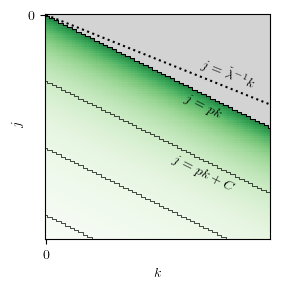

In [4]:
figure(figsize=(5*0.75,4*0.75))
gca()[:set_aspect]("equal")
N = 100

kpts = 0:N; jpts = 0:N
imshow([coefbd2(j,k) for j in jpts, k in kpts],
extent=(-1/2,N+1/2,-1/2,N+1/2),interpolation="nearest",cmap="Greens",vmax=1.2,origin="lower")


xlim(-1/2,N+1/2)
ylim(N+1/2,-1/2)
xticks([0]);yticks([0])
xlabel("\$k\$"); ylabel("\$j\$")

fill_between(discretisex(kpts),discretisey(kpts,x->0.,:Down),discretisey(kpts,x->p*x,:Up),facecolor="lightgrey")
plot(discretisex(kpts),discretisey(kpts,x->p*x,:Up),"k",linewidth=0.75)


for n = 30:30:2N
    plot(discretisex(kpts),discretisey(kpts,x->p*x+n,:Down),"k",linewidth=0.5)
end

plot(kpts,kpts*cli,"k:")
prop=0.81; text(prop*N,-0.06N+cli*prop*N,"\$j=\\check\\lambda\^\{-1\} k\$",
verticalalignment="center",horizontalalignment="center",rotation=-atand(cli))
prop = 0.7; text(prop*N,0.06N+p*prop*N,"\$j=p k\$",
    verticalalignment="center",horizontalalignment="center",rotation=-atand(p))

prop = 0.7; text(prop*N,30+0.06N+p*prop*N,"\$j=p k+C\$",
    verticalalignment="center",horizontalalignment="center",rotation=-atand(p))


tight_layout()
savefig("../figures/theorems-2.eps")

## theorems ~together~

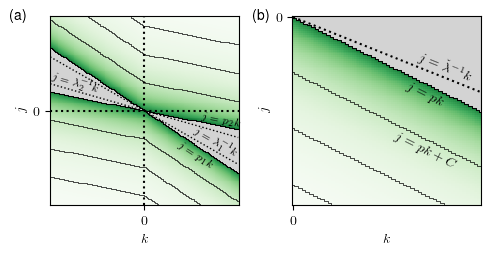

In [5]:
figure(figsize=(5,3))

#figure 1

subplot(1,2,1)

gca()[:set_aspect]("equal")
N = 100

xlim(-N-1/2,N+1/2)
ylim(-N-1/2,N+1/2)
xticks([0]);yticks([0])
xlabel("\$k\$"); ylabel("\$j\$")

kpts = -N:N; jpts = -N:N
fill_between(discretisex(kpts),discretisey(kpts,x->-maxv(x),:Down),discretisey(kpts,x->maxv(-x),:Up),linewidth=0,facecolor="lightgrey")
plot(discretisex(kpts),discretisey(kpts,x->-maxv(x),:Down),"k",linewidth=0.75)
plot(discretisex(kpts),discretisey(kpts,x->maxv(-x),:Up),"k",linewidth=0.75)


for n = 30:30:2N
    plot(discretisex(kpts),discretisey(kpts,x->-maxv(x)-n,:Down),"k",linewidth=0.5)
 plot(discretisex(kpts),discretisey(kpts,x->maxv(-x)+n,:Up),"k",linewidth=0.5)
end

fsz = 8

plot(kpts,-kpts*l1i,"k:",linewidth=1); plot(kpts,-kpts*l2i,"k:",linewidth=1)
prop = 0.74; text(prop*N,N/13-l1i*prop*N,"\$j=\\lambda\_1\^\{-1\} k\$", fontsize=fsz,
verticalalignment="center",horizontalalignment="center",rotation=-atand(l1i))
prop = -0.74; text(prop*N,N/14-l2i*prop*N,"\$j=\\lambda\_2\^\{-1\} k\$", fontsize=fsz,
    verticalalignment="center",horizontalalignment="center",rotation=-atand(l2i))

prop= 0.53
text(prop*N,N/30-p1*prop*N,"\$j=p_1 k\$", fontsize=fsz,
verticalalignment="top",horizontalalignment="center",rotation=-atand(p1))
prop= 0.8 # -0.73, N/50, verticalalignment="top"
text(prop*N,N/20-p2*prop*N,"\$j=p\_2 k\$", fontsize=fsz,
verticalalignment="center",horizontalalignment="center",rotation=-atand(p2))

plot((N+1/2)*[-1,1],[0,0],"k:")
plot([0,0],(N+1/2)*[-1,1],"k:")



imshow([coefbd(j,k) for j in jpts, k in kpts],
extent=(-N-1/2,N+1/2,-N-1/2,N+1/2),interpolation="nearest",cmap="Greens",vmax=1.2)
# plot(kpts,kpts,"k--")
# plot(kpts,-kpts,"k--")

gca()[:text](-0.21, 1.0, "(a)",
    horizontalalignment="left",
    verticalalignment="center",
    transform=gca()[:transAxes])

# figure 2

subplot(1,2,2)
gca()[:set_aspect]("equal")
N = 100

kpts = 0:N; jpts = 0:N
imshow([coefbd2(j,k) for j in jpts, k in kpts],
extent=(-1/2,N+1/2,-1/2,N+1/2),interpolation="nearest",cmap="Greens",vmax=1.2,origin="lower")


xlim(-1/2,N+1/2)
ylim(N+1/2,-1/2)
xticks([0]);yticks([0])
xlabel("\$k\$"); ylabel("\$j\$")

fill_between(discretisex(kpts),discretisey(kpts,x->0.,:Down),discretisey(kpts,x->p*x,:Up),facecolor="lightgrey")
plot(discretisex(kpts),discretisey(kpts,x->p*x,:Up),"k",linewidth=0.75)


for n = 30:30:2N
    plot(discretisex(kpts),discretisey(kpts,x->p*x+n,:Down),"k",linewidth=0.5)
end

plot(kpts,kpts*cli,"k:")
prop=0.81; text(prop*N,-0.06N+cli*prop*N,"\$j=\\check\\lambda\^\{-1\} k\$",
verticalalignment="center",horizontalalignment="center",rotation=-atand(cli))
prop = 0.7; text(prop*N,0.06N+p*prop*N,"\$j=p k\$",
    verticalalignment="center",horizontalalignment="center",rotation=-atand(p))

prop = 0.7; text(prop*N,30+0.06N+p*prop*N,"\$j=p k+C\$",
    verticalalignment="center",horizontalalignment="center",rotation=-atand(p))

gca()[:text](-0.21, 1.0, "(b)",
    horizontalalignment="left",
    verticalalignment="center",
    transform=gca()[:transAxes])

tight_layout()
savefig("../figures/theorems.eps")



In [11]:
?text

search: text Text text3D text2D TextDisplay @text_str istext PyTextIO istextmime



Add text to the axes.

Add text in string `s` to axis at location `x`, `y`, data
coordinates.

Parameters
----------
x, y : scalars
    data coordinates

s : string
    text

fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

withdash : boolean, optional, default: False
    Creates a `~matplotlib.text.TextWithDash` instance instead of a
    `~matplotlib.text.Text` instance.

Other parameters
----------------
kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

Examples
--------
Individual keyword arguments can be used to override any given
parameter::

    >>> text(x, y, s, fontsize=12)

The default transform specifies that text is in data coords,
alternatively, you can specify text in axis coords (0,0 is
lower-left and 1,1 is upper-right).  The example below places
text in the center of the axes::

    >>> text(0.5, 0.5,'m